| 열 이름                           | 전체 명칭                                | 설명                                                                                   |
|-----------------------------------|-------------------------------------------|----------------------------------------------------------------------------------------|
| 'id'                              | id                                        | 각 사람(행)마다 고유함                                                                   |
| 'Gender'                          | 성별                                      | 사람의 성별                                                                             |
| 'Age'                             | 나이                                      | 데이터 타입 = float, 나이는 14세에서 61세 사이                                          |
| 'Height'                          | 키                                        | 키 단위 = m, 1.45m에서 1.98m 사이                                                       |
| 'Weight'                          | 몸무게                                    | 몸무게 39kg에서 165kg 사이, 단위 = kg                                                   |
| 'family_history_with_overweight'  | 비만 가족력                               | 예 / 아니오                                                                             |
| 'FAVC'                            | 고칼로리 음식의 자주 섭취                  | 예 / 아니오, 고칼로리 음식을 자주 섭취하는지에 대한 답변                                 |
| 'FCVC'                            | 야채 섭취 빈도                             | 예 / 아니오                                                                             |
| 'NCP'                             | 주요 식사 횟수                             | 데이터 타입 = float, NCP는 1에서 4 사이, 실제 값은 1, 2, 3, 4여야 하지만 합성 데이터이므로 float 값 사용 |
| 'CAEC'                            | 식사 사이 음식 섭취                        | '가끔', '자주', '아니요', '항상'의 4가지 값으로 구성                                     |
| 'SMOKE'                           | 흡연                                      | 예 / 아니오, 흡연 여부에 대한 답변                                                      |
| 'CH2O'                            | 일일 물 섭취량                            | CH2O는 1에서 3 사이의 값, 합성 데이터이기 때문에 float이고, 값은 1, 2, 3                |
| 'SCC'                             | 칼로리 섭취 모니터링                       | 예 / 아니오                                                                             |
| 'FAF'                             | 신체 활동 빈도                            | FAF는 0에서 3 사이, 0은 신체 활동 없음을, 3은 높은 운동량을 의미, 합성 데이터이므로 float 값으로 주어짐 |
| 'TUE'                             | 기술 기기 사용 시간                        | TUE는 0에서 2 사이, "당신은 건강을 추적하기 위해 기술 기기를 얼마나 오래 사용하셨습니까?"에 대한 답변, 합성 데이터이므로 float 값으로 주어짐 |
| 'CALC'                            | 알코올 섭취                               | '가끔', '아니요', '자주'의 3가지 값                                                     |
| 'MTRANS'                          | 이용하는 교통수단                          | 대중 교통, 자동차, 도보, 오토바이, 자전거의 5가지 값                                    |
| 'NObeyesdad'                      | 목표                                      | 목표 변수!! 7가지 값을 가지며, 이 대회에서는 클래스 이름을 제공해야 함                   |


NObeyesdad (목표 변수):
- Insufficient_Weight : 18.5 미만
- Normal_Weight : 18.5에서 24.9 사이
- Obesity_Type_I : 30.0에서 34.9 사이
- Obesity_Type_II : 35.0에서 39.9 사이
- Obesity_Type_III : 40 이상
- Overweight_Level_I, Overweight_Level_II는 25에서 29 사이의 값을 가집니다

## 필요한 라이브러리 설치

In [ ]:
pip install category_encoders


  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)


In [28]:
pip install optuna


  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   ------- -------------------------------- 81.9/413.4 kB 4.5 MB/s eta 0:00:01
   --------------------- ------------------ 225.3/413.4 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------  409.6/413.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 413.4/413.4 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.4 kB ? eta -:--:--
   -------------- ------------------------- 81.9/233.4 kB ? eta -:--:--
   ----------------------------------- ---- 204.8/233.4 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 233.4/233.4 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 1.9 MB/s eta 0:00:02
    --------------------------------------- 0.0/2.1 MB 1.9 MB/s eta 0:00:02
   -- ------------------

In [29]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [30]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import OneHotEncoder, CatBoostEncoder, MEstimateEncoder
from sklearn.model_selection import StratifiedGroupKFold


from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression

from sklearn import set_config
import os
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import StratifiedKFold
import optuna
from sklearn.compose import ColumnTransformer
from prettytable import PrettyTable

from sklearn.compose import make_column_transformer
from sklearn.base import clone
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 데이터 불러오기

In [35]:
# 결과 재현을 위한 기본 설정
pd.set_option("display.max_rows", 100)  # 출력할 최대 행 수
TARGET = "NObeyesdad"  # 예측 목표 변수
n_splits = 10  # 교차 검증 분할 수
RANDOM_SEED = 43  # 난수 시드값

In [37]:
train = pd.read_csv('data/train.csv')
sample_sub = pd.read_csv('data/sample_submission.csv')
test = pd.read_csv('data/test.csv')

## 데이터 탐색하기

In [43]:
def prettify_df(df):
    """
    데이터프레임을 깔끔하게 출력하는 함수

    Args:
    df (pandas.DataFrame): 출력하고자 하는 데이터 프레임

    Returns:
    None: 함수는 테이블 형태로 데이터프레임을 콘솔에 출력하며, 별도의 반환값은 없다.
    """
    table = PrettyTable()  # PrettyTable 인스턴스 생성
    table.field_names = df.columns  # 데이터프레임의 열 이름을 테이블 필드 이름으로 설정

    for row in df.values:  # 데이터프레임의 각 행에 대해
        table.add_row(row)  # 테이블에 행 추가
    print(table)  # 테이블을 콘솔에 출력    

In [44]:
train.head(8)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II


## EDA

In [48]:
# train data 행&열 정보 출력
print("훈련 데이터")
print(f"총 행의 수: {len(train)}")  # 훈련 데이터의 총 행 수를 출력
print(f"총 열의 수: {train.shape[1]}\n")  # 훈련 데이터의 총 열 수를 출력

# 테스트 데이터 정보 출력
print("테스트 데이터")
print(f"총 행의 수: {len(test)}")  # 테스트 데이터의 총 행 수를 출력
print(f"총 열의 수: {test.shape[1]}")  # 테스트 데이터의 총 열 수를 출력

훈련 데이터
총 행의 수: 20758
총 열의 수: 18

테스트 데이터
총 행의 수: 13840
총 열의 수: 17


In [51]:
# 결측치 및 고유값 개수 확인
# FHWO: family_history_with_overweight의 약자로 이름 변경
train_copy = train.rename(columns={"family_history_with_overweight":"FHWO"})

tmp = pd.DataFrame(index=train_copy.columns)  # 임시 데이터 프레임 생성
tmp['count'] = train_copy.count()  # 각 열의 유효한 데이터 개수
tmp['dtype'] = train_copy.dtypes  # 데이터 타입
tmp['nunique'] = train_copy.nunique()  # 고유값 개수
tmp['%nunique'] = (tmp['nunique']/len(train_copy))*100  # 전체 대비 고유값 비율
tmp['%null'] = (train_copy.isnull().sum()/len(train_copy))*100  # 결측치 비율
tmp['min'] = train_copy.min()  # 최소값
tmp['max'] = train_copy.max()  # 최대값
tmp

# 열 이름 변경 및 소수점 세 자리로 반올림
tmp.reset_index(inplace=True)
tmp = tmp.rename(columns = {"index":"Column Name"})
tmp = tmp.round(3)
prettify_df(tmp)  # 깔끔한 테이블로 출력
del tmp, train_copy  # 임시 데이터 및 복사본 삭제

+-------------+-------+---------+---------+----------+-------+---------------------+---------------------+
| Column Name | count |  dtype  | nunique | %nunique | %null |         min         |         max         |
+-------------+-------+---------+---------+----------+-------+---------------------+---------------------+
|      id     | 20758 |  int64  |  20758  |  100.0   |  0.0  |          0          |        20757        |
|    Gender   | 20758 |  object |    2    |   0.01   |  0.0  |        Female       |         Male        |
|     Age     | 20758 | float64 |   1703  |  8.204   |  0.0  |         14.0        |         61.0        |
|    Height   | 20758 | float64 |   1833  |   8.83   |  0.0  |         1.45        |       1.975663      |
|    Weight   | 20758 | float64 |   1979  |  9.534   |  0.0  |         39.0        |      165.057269     |
|     FHWO    | 20758 |  object |    2    |   0.01   |  0.0  |          no         |         yes         |
|     FAVC    | 20758 |  object |    

In [56]:
# 타겟 변수와 성별에 따른 분포 확인

# 소수점 두 자리까지 표시되도록 설정
pd.set_option('display.float_format', '{:.2f}'.format)

# 타겟 변수와 성별에 따라 그룹화하고, 각 그룹의 id 개수를 세어 새로운 데이터프레임 생성
tmp = pd.DataFrame(train.groupby([TARGET, 'Gender'])["id"].agg('count'))
tmp.columns = ['Count']  # 생성된 열의 이름을 'Count'로 설정

# 타겟 변수의 각 클래스별로 값의 개수를 세고, 이를 tmp 데이터프레임과 병합
tmp = pd.merge(tmp, train[TARGET].value_counts(), left_index=True, right_index=True)
tmp.columns = ['gender_count', 'target_class_count']  # 병합 후 열 이름 재설정

# 성별 분포 비율과 타겟 클래스 분포 비율 계산
tmp['%gender_count'] = tmp['gender_count'] / tmp['target_class_count']
tmp["%target_class_count"] = tmp['target_class_count'] / len(train)

# 최종 데이터프레임 재구성
tmp = tmp[['gender_count', '%gender_count', 'target_class_count', '%target_class_count']]

# 결과 출력
print("타겟 변수와 성별에 따른 분포")
tmp

타겟 변수와 성별에 따른 분포


gender_count  %gender_count  target_class_count  \
NObeyesdad          Gender                                                    
Insufficient_Weight Female          1621           0.64                2523   
                    Male             902           0.36                2523   
Normal_Weight       Female          1660           0.54                3082   
                    Male            1422           0.46                3082   
Obesity_Type_I      Female          1267           0.44                2910   
                    Male            1643           0.56                2910   
Obesity_Type_II     Female             8           0.00                3248   
                    Male            3240           1.00                3248   
Obesity_Type_III    Female          4041           1.00                4046   
                    Male               5           0.00                4046   
Overweight_Level_I  Female          1070           0.44                2427   
                    Male            1357           0.56                2427   
Overweight_Level_II Female           755           0.30                2522   
                    Male            1767           0.70                2522   

                            %target_class_count  
NObeyesdad          Gender                       
Insufficient_Weight Female                 0.12  
                    Male                   0.12  
Normal_Weight       Female                 0.15  
                    Male                   0.15  
Obesity_Type_I      Female                 0.14  
                    Male                   0.14  
Obesity_Type_II     Female                 0.16  
                    Male                   0.16  
Obesity_Type_III    Female                 0.19  
                    Male                   0.19  
Overweight_Level_I  Female                 0.12  
                    Male                   0.12  
Overweight_Level_II Female                 0.12  
                    Male                   0.12

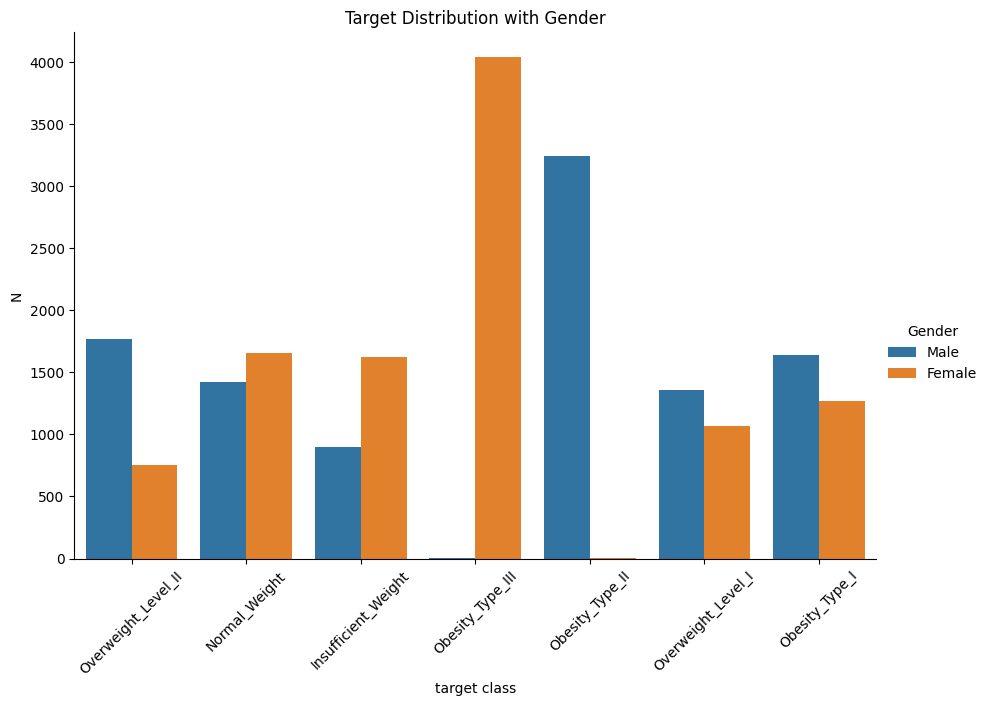

In [58]:
# 데이터셋 준비
# train 데이터셋에 'Gender'와 'TARGET' 열을 이용해 필요한 정보를 포함한 새로운 DataFrame 생성
data_for_plot = train[['Gender', TARGET]].copy()

sns.catplot(x=TARGET, hue='Gender', data=data_for_plot, kind='count', height=6, aspect=1.5)

# 그래프 제목 설정
plt.title('Target Distribution with Gender')

# x축 라벨
plt.xlabel('target class')

# y축 라벨
plt.ylabel('N')

plt.xticks(rotation=45)  
plt.show()

In [60]:
# 수치형 변수 선택: 'float' 타입을 가진 열을 선택하여 리스트로 저장
raw_num_cols = list(train.select_dtypes("float").columns)

# 범주형 변수 선택: 수치형 변수와 타겟 변수를 제외한 나머지 열을 리스트로 저장
raw_cat_cols = list(train.columns.drop(raw_num_cols + [TARGET]))

# 각 범주형 변수의 전체 형태 설명
full_form = dict({
    'FAVC': "Frequent consumption of high caloric food",  # 고칼로리 음식의 자주 섭취
    'FCVC': "Frequency of consumption of vegetables",  # 채소 섭취 빈도
    'NCP': "Number of main meal",  # 주요 식사 횟수
    'CAEC': "Consumption of food between meals",  # 식사 사이 음식 섭취
    'CH2O': "Consumption of water daily",  # 일일 물 섭취량
    'SCC': "Calories consumption monitoring",  # 칼로리 섭취 모니터링
    'FAF': "Physical activity frequency",  # 신체 활동 빈도
    'TUE': "Time using technology devices",  # 기술 기기 사용 시간
    'CALC': "Consumption of alcohol",  # 알코올 섭취
    'MTRANS': "Transportation used"  # 사용하는 교통수단
})

- 비만 유형 II(OBESITY_TYPE_II)에 속한 모든 사람은 남성이며, 비만 유형 III(OBESITY_TYPE_III)에 속한 모든 사람은 여성이다.
- 과체중 단계 II(OVERWEIGHT_LEVEL_II)는 약 70%가 남성이고, 체중 미달(INSUFFICIENT_WEIGHT)은 60% 이상이 여성이다.

- 이러한 점들로부터 성별은 비만 예측에 있어 중요한 특성임을 알 수 있다.

## 데이터 시각화

### 타겟 변수의 분포와 성별

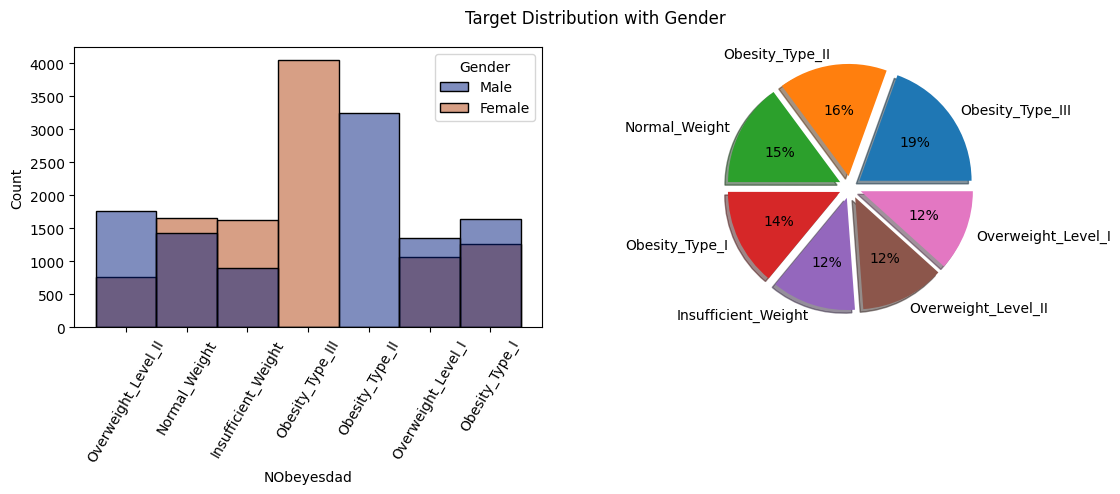

In [63]:
# 서브플롯 설정
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 전체 그래프의 제목 설정
plt.suptitle("Target Distribution with Gender")

# 첫 번쨰 서브플롯: 타겟 변수의 분포를 성별에 따라 히스토그램으로 시각화
sns.histplot(binwidth=0.5, x=TARGET, data=train, hue='Gender', palette="dark", ax=axs[0], discrete=True)
axs[0].tick_params(axis='x', rotation=60)  # x축 라벨 회전

# 두 번째 서브플롯: 타겟 변수의 분포를 파이 차트로 시각화
axs[1].pie(
    train[TARGET].value_counts(),  # 타겟 변수의 값별 개수
    shadow = True,  # 그림자 효과
    explode = [.1 for _ in range(train[TARGET].nunique())],  # 각 조각이 돌출되는 정도 설정
    labels = train[TARGET].value_counts().index,  # 각 조각의 라벨 설정
    autopct = '%1.f%%',  # 각 조각의 백분율 표시 형식
)

# 여백 최소화
plt.tight_layout()

# 그래프 표시
plt.show()

### 수치형 변수 바이올린 시각화

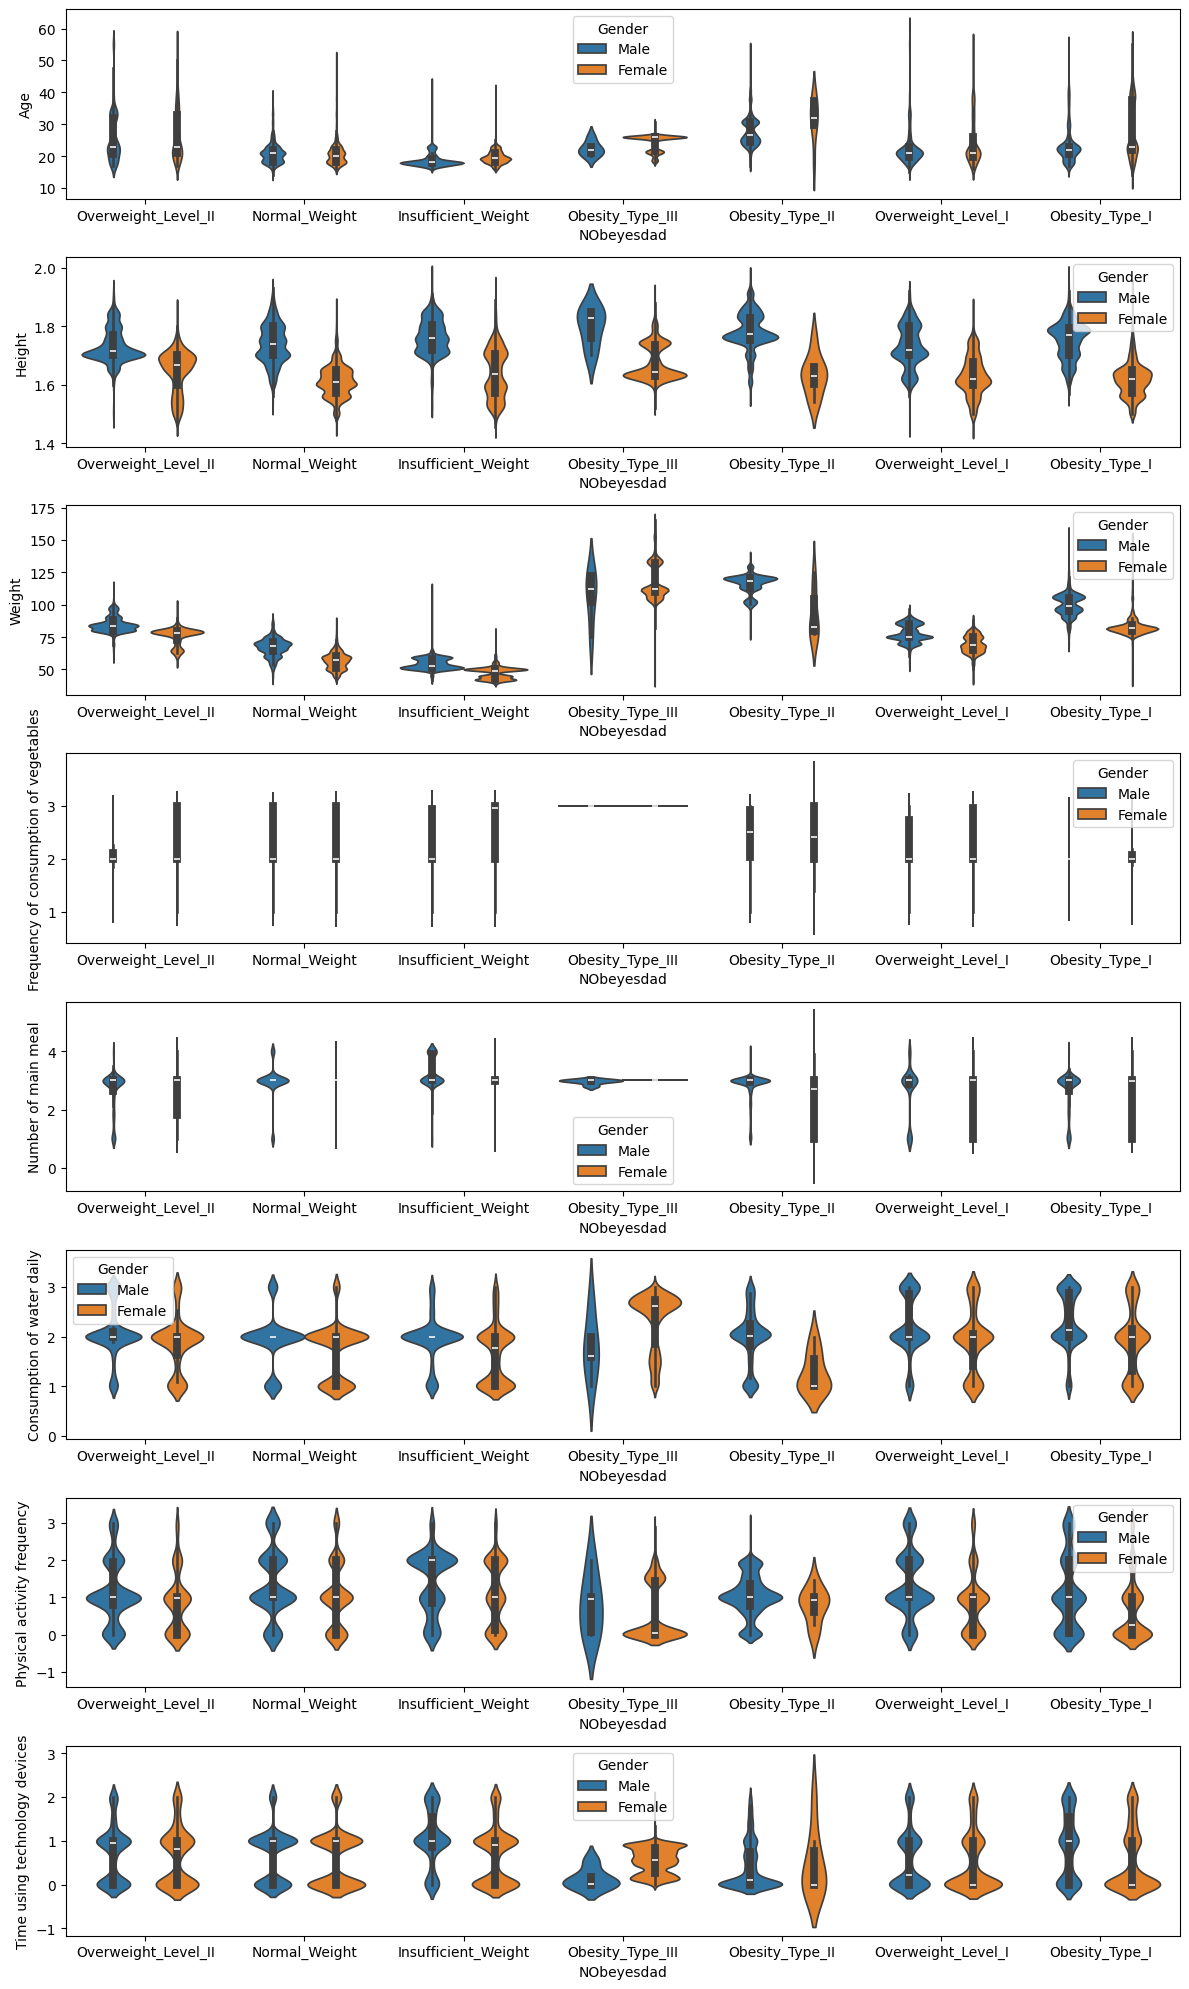

In [66]:
# 수치형 변수 각각에 대해 바이올린 플롯 생성을 위한 서브플롯 설정
fig, axs = plt.subplots(len(raw_num_cols), 1, figsize=(12, len(raw_num_cols) * 2.5), sharex=False)

# 각 수치형 변수에 대해 반복하여 바이올린 플롯 생성
for i, col in enumerate(raw_num_cols):
    # 바이올린 플롯: 타겟 변수에 따른 각 수치형 변수의 분포 및 성별 구분
    sns.violinplot(x=TARGET, y=col, hue="Gender", data=train, ax=axs[i], split=False)
    
    # 변수의 전체 이름이 full_form 사전에 있으면 y축 라벨을 전체 이름으로 설정
    if col in full_form.keys():
        axs[i].set_ylabel(full_form[col])

# 그래프들 사이의 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()

위 플롯에서 얻은 통찰:

- 매우 작은 샘플 크기 때문에 Obesity_Type_II 클래스에서의 여성 분포와 "Obesity_Type_III"에서의 남성 분포는 무시해야 한다.
- 체중 미달 범주에 있는 사람들이 체중을 늘리기 위해 주요 식사 횟수가 더 높은 것으로 보인다.
- Obesity Type III 클래스에 있는 모든 사람의 채소 섭취 빈도는 세 번이다.
- 몸무게, 키 및 성별은 가장 중요한 특성으로 보인다. 몸무게는 다른 클래스에 대해 매우 명확한 차별화를 보여준다.

### 범주형 변수 시각화

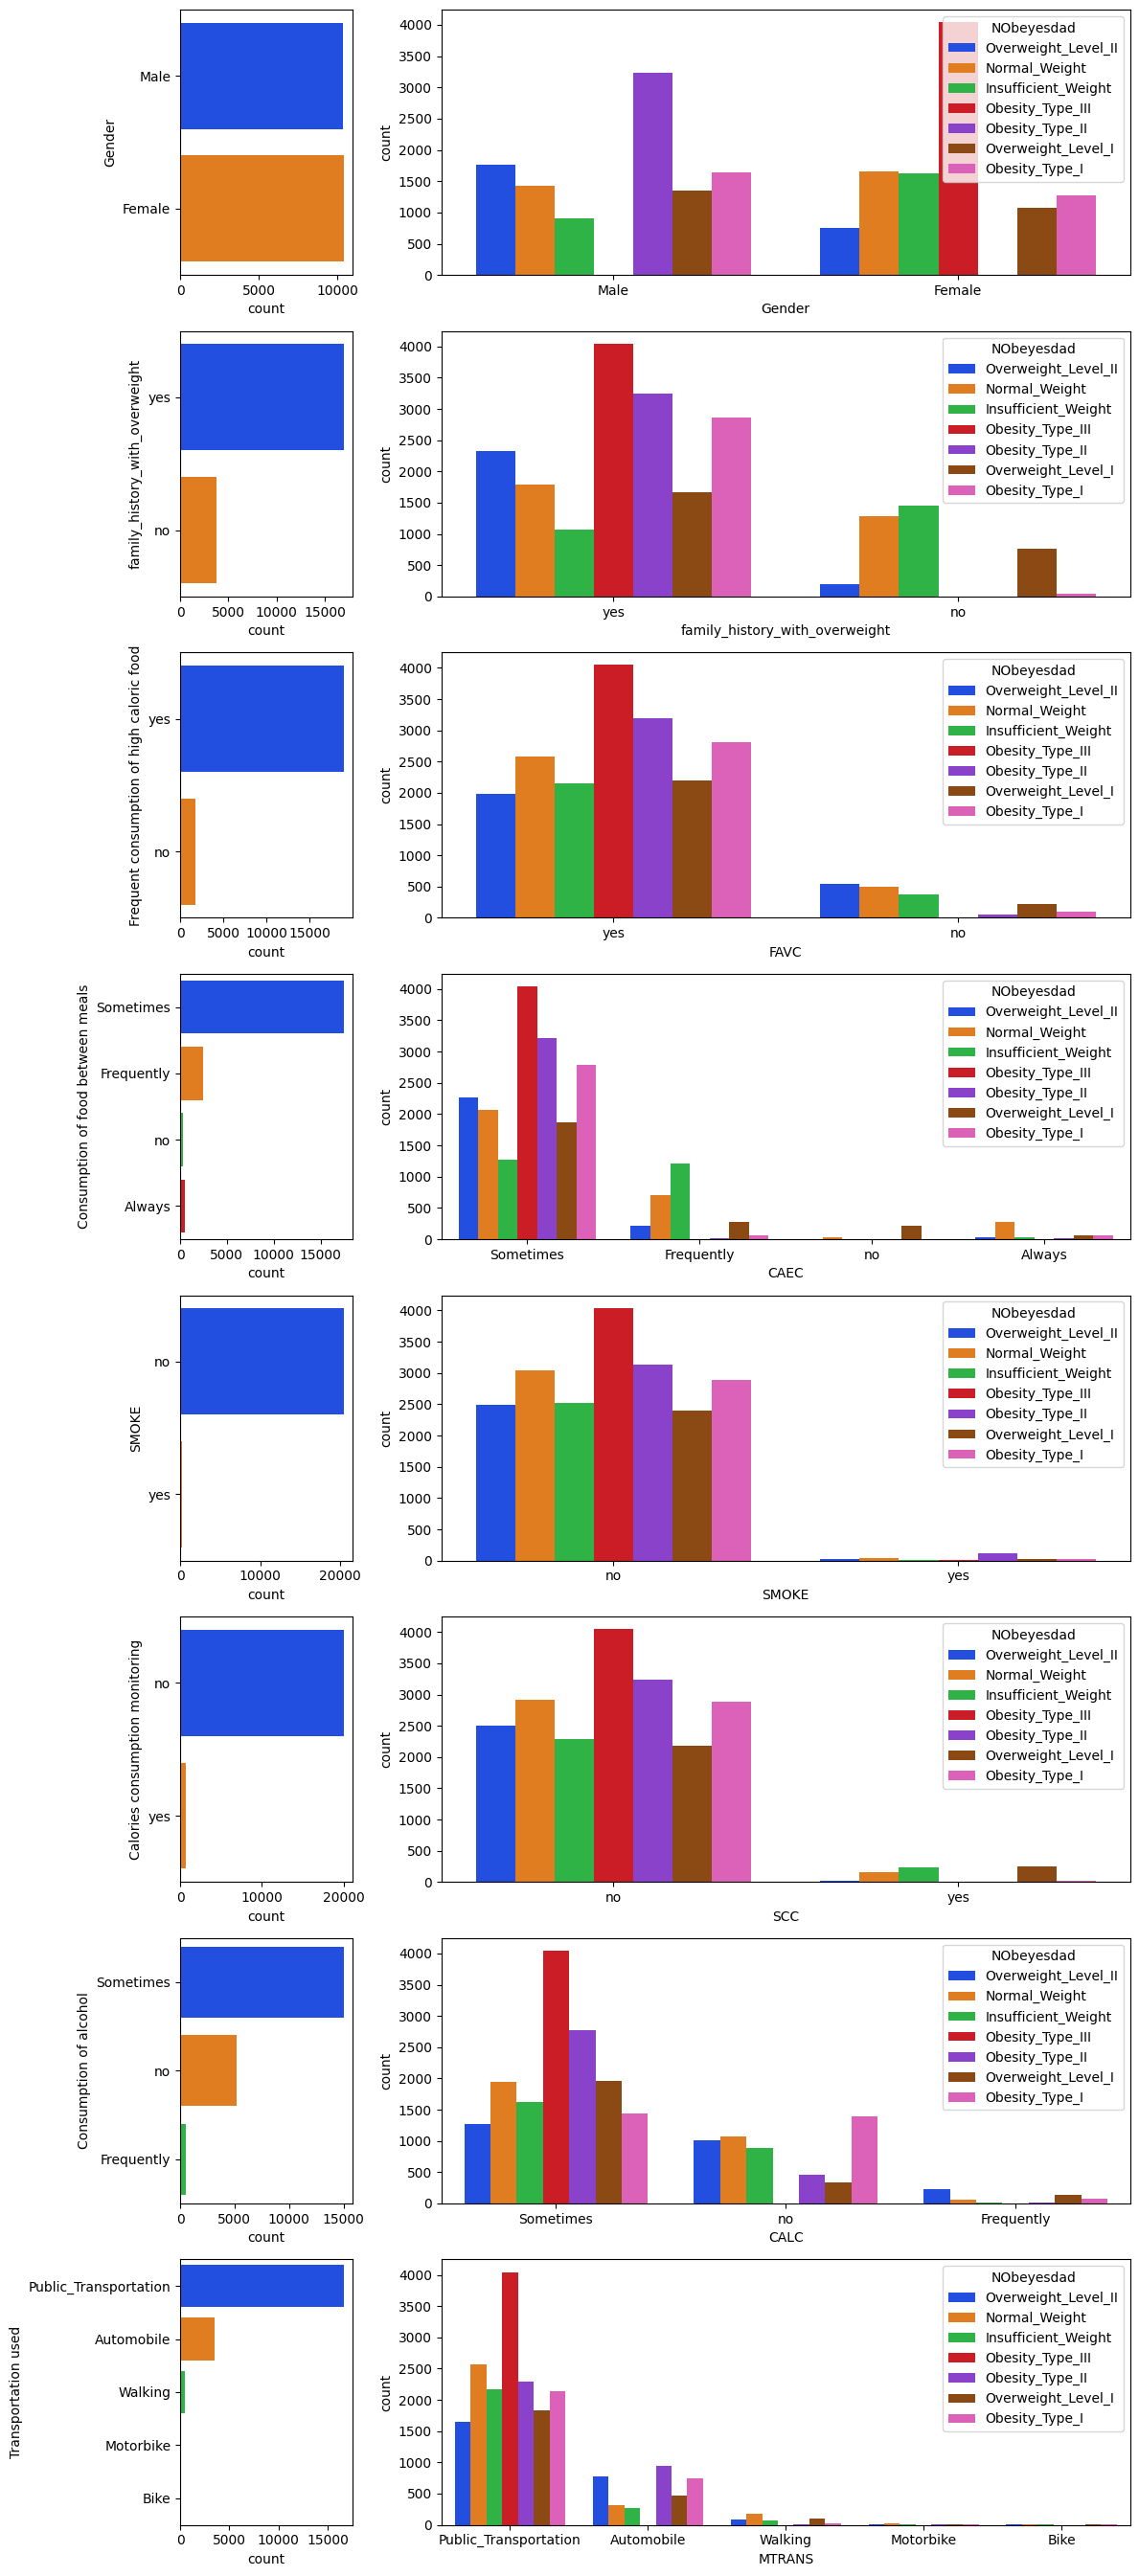

In [72]:
# 서브플롯의 행 수는 범주형 변수에서 하나를 뺀 값, 열 수는 2로 설정
# figsize는 그래프의 전체 크기를 결정하고, width_ratios는 열의 너비 비율을 설정
_, axs = plt.subplots(int(len(raw_cat_cols) -1), 2, figsize=(12, len(raw_cat_cols) * 3), width_ratios = [1, 4])

# 첫 번째 범주형 변수를 제외한 나머지 변수들에 대해 반복
for i, col in enumerate(raw_cat_cols[1:]):
    # 첫 번째 열(왼쪽): 각 범주형 변수의 기본 분포를 세로 막대 그래프 시각화
    sns.countplot(y=col, data=train, palette="bright", ax=axs[i, 0])

    # 두 번째 열(오른쪽): 타겟 변수에 따른 각 범주형 변수의 분포를 가로 막대 그래프로 시각화
    sns.countplot(x=col, data=train, hue=TARGET, palette="bright", ax=axs[i, 1])
    
    # 변수의 전체 이름이 full_form 사전에 있으면 y축 라벨을 전체 이름으로 설정
    if col in full_form.keys():
        axs[i, 0].set_ylabel(full_form[col])

# 그래프들 사이의 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()        

### 수치형 변수 상관관계

<Axes: >

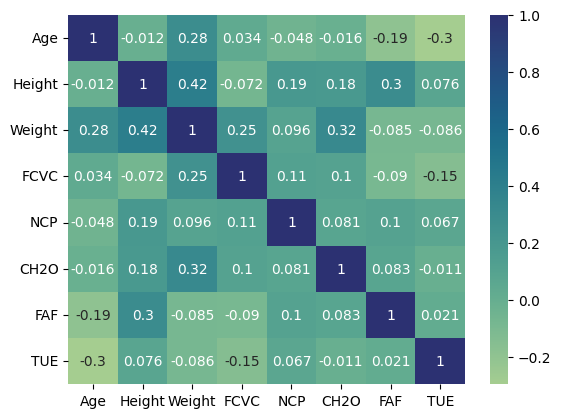

In [73]:
tmp = train[raw_num_cols].corr("pearson")
sns.heatmap(tmp,annot=True, cmap="crest")

- 키는 몸무게, 신체 활동 빈도(FAF)와 양의 상관관계를 가진다. 
- 더 높은 몸무게를 가진 사람들은 더 많은 물을 마신다.